# 1.Data Visualization Practice
1.   In Python, data visualization plays a crucial role in various aspects of data science and analysis. Here are some key reasons why data visualization is considered essential
*  Pattern and Relationship Exploration
*  Insight Generation
*  Decision Support
*  Enhanced Communication
---








In [39]:
import pandas as pd
#import gdown
#gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)

ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19



1.   Matplotlib: Visualization with Python
2.   Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.
*   Create publication quality plots.
*   Make interactive figures that can zoom, pan, update.
*   Customize visual style and layout.
*   Export to many file formats.
*   Embed in JupyterLab and Graphical User Interfaces.
*   Use a rich array of third-party packages built on Matplotlib.
---








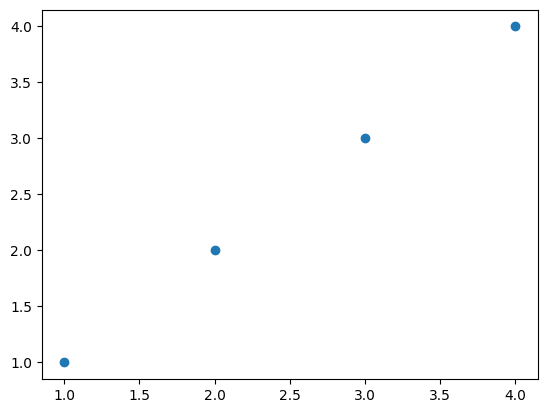

In [41]:
## Simple Example of Drawing Scattering Plot

plt.scatter([1,2,3,4], [1,2,3,4])
plt.show()

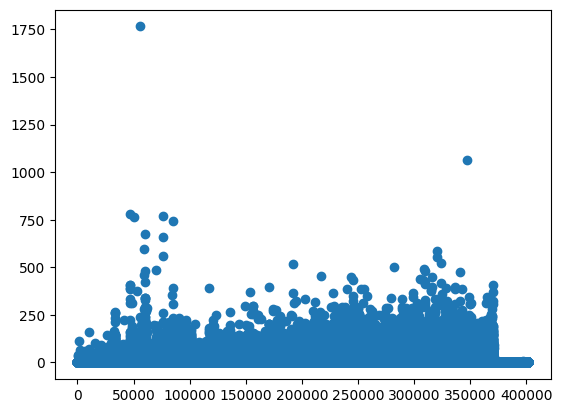

In [42]:
plt.scatter(ns_book7['번호'], ns_book7['대출건수'])
plt.show()

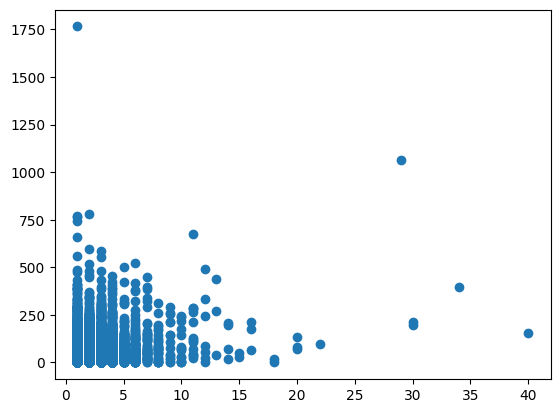

In [43]:
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'])
plt.show()

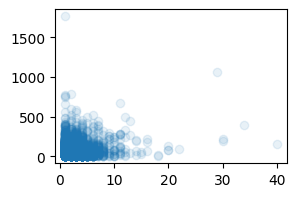

In [46]:
plt.figure(figsize =(3,2))
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'],alpha=0.1)
plt.show()

In [47]:
print(plt.rcParams['figure.figsize'])

[6.4, 4.8]


In [49]:
plt.rcParams['scatter.marker']

'o'

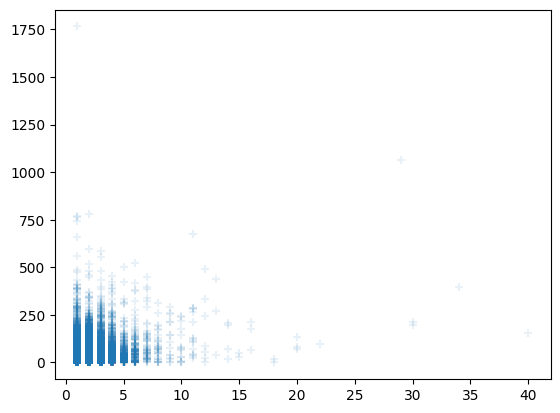

In [52]:
plt.rcParams['scatter.marker'] = '+'
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
plt.show()

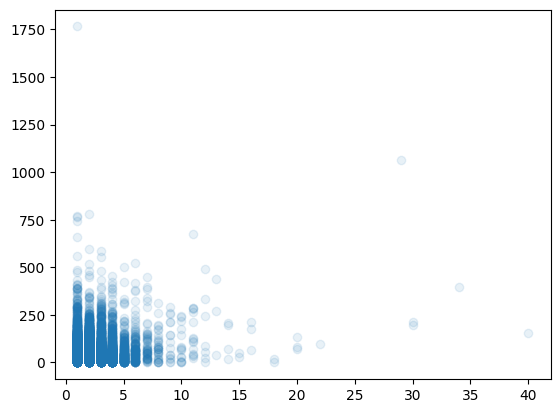

In [44]:
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
plt.show()

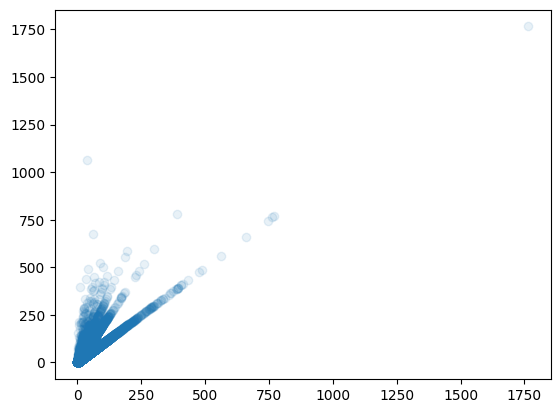

In [45]:
average_borrows = ns_book7['대출건수']/ns_book7['도서권수']
plt.scatter(average_borrows, ns_book7['대출건수'], alpha=0.1)
plt.show()

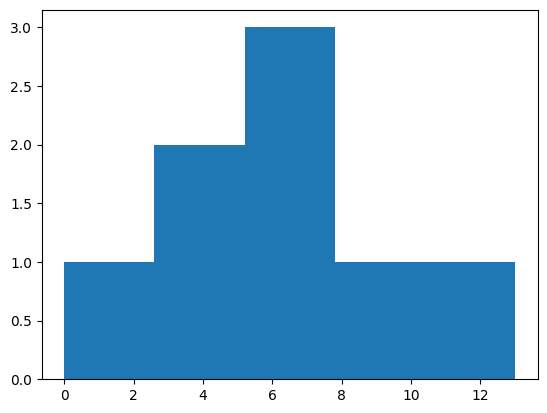

In [53]:
## Simple Example of Drawing Histogram

plt.hist([0,3,5,6,7,7,9,13],bins=5)
#plt.hist([0,3,5,6,7,7,9,13])
plt.show()

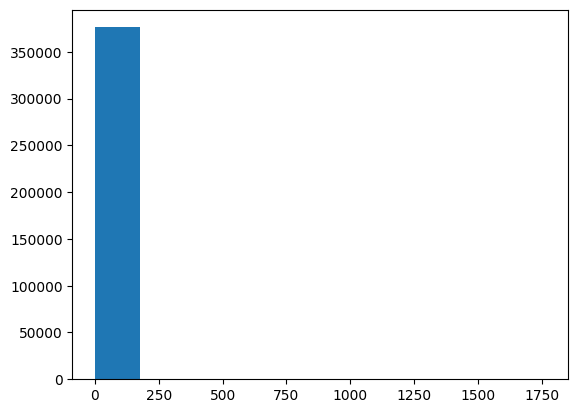

In [54]:
plt.hist(ns_book7['대출건수'])
plt.show()

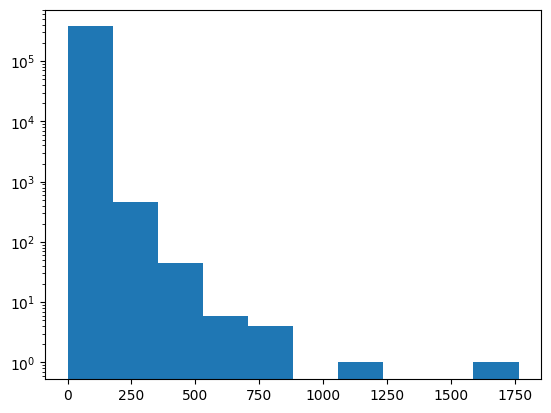

In [55]:
plt.hist(ns_book7['대출건수'])
plt.yscale('log')
plt.show()

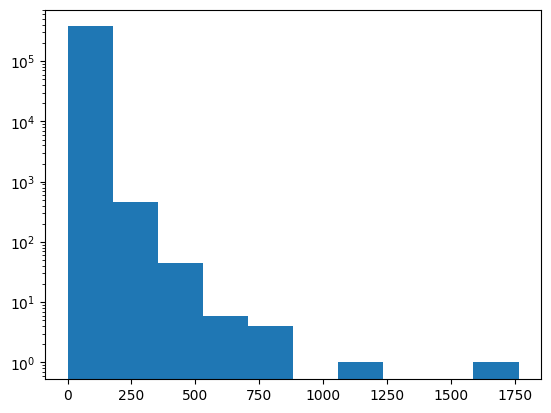

In [56]:
plt.hist(ns_book7['대출건수'], log=True)
plt.show()

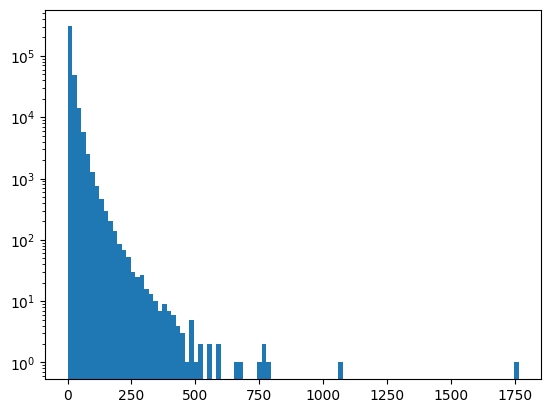

In [57]:
plt.hist(ns_book7['대출건수'], bins=100)
plt.yscale('log')
plt.show()

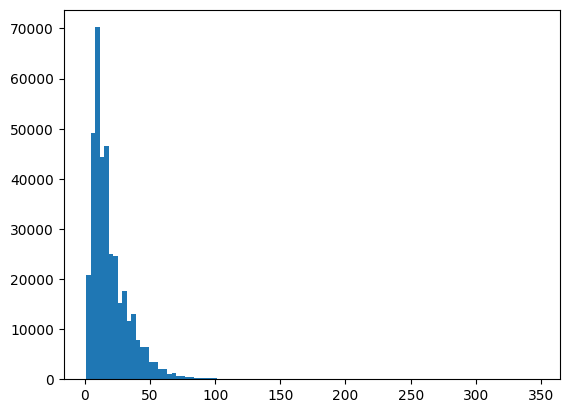

In [58]:
title_len = ns_book7['도서명'].apply(len)
plt.hist(title_len, bins=100)
plt.show()

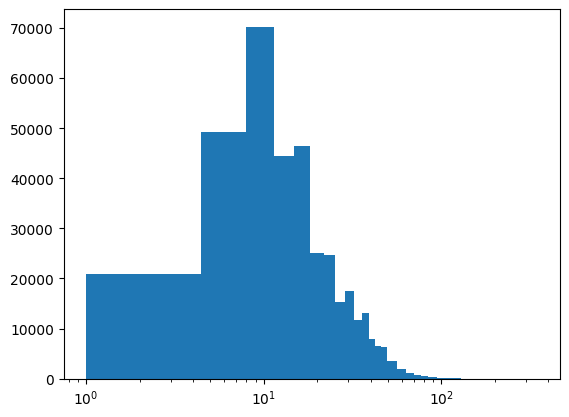

In [59]:
plt.hist(title_len, bins=100)
plt.xscale('log')
plt.show()

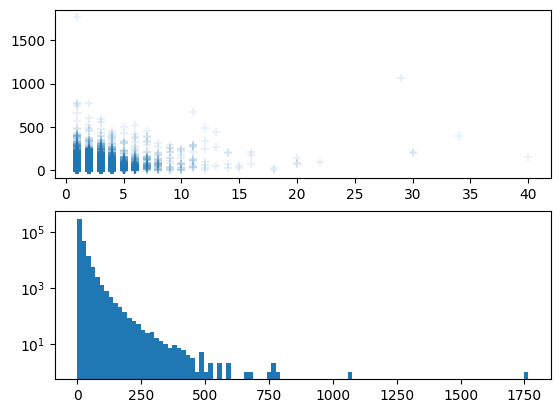

In [60]:
fig, axs = plt.subplots(2)

# axs[0] : 첫번째 그래프
axs[0].scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)

# axs[1] : 두번쨰 그래프
axs[1].hist(ns_book7['대출건수'], bins=100)
axs[1].set_yscale('log')

fig.show()

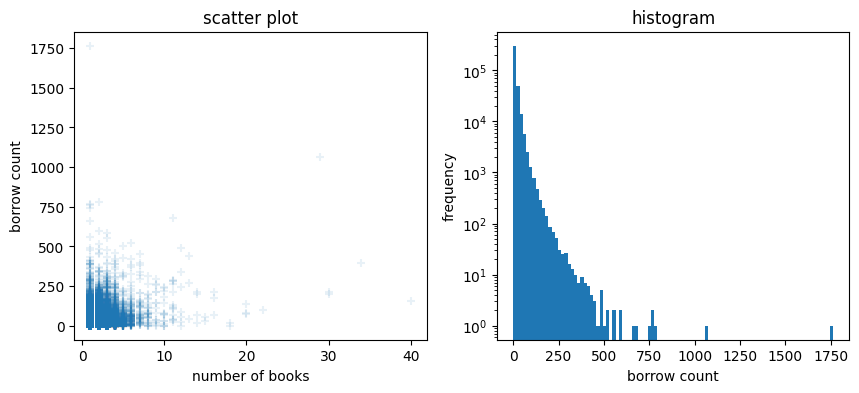

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
axs[0].set_title('scatter plot')
axs[0].set_xlabel('number of books')
axs[0].set_ylabel('borrow count')

axs[1].hist(ns_book7['대출건수'], bins=100)
axs[1].set_title('histogram')
axs[1].set_yscale('log')
axs[1].set_xlabel('borrow count')
axs[1].set_ylabel('frequency')

fig.show()

In [64]:
## Data Pre Processing to Draw Plot
count_by_year = ns_book7['발행년도'].value_counts()
count_by_year

2012    18601
2014    17797
2009    17611
2011    17523
2010    17503
        ...  
2650        1
2108        1
2104        1
2560        1
1947        1
Name: 발행년도, Length: 87, dtype: int64

In [65]:
count_by_year = count_by_year.sort_index()
count_by_year

1947     1
1948     1
1949     1
1952    11
1954     1
        ..
2551     1
2552     2
2559     1
2560     1
2650     1
Name: 발행년도, Length: 87, dtype: int64

In [66]:
count_by_year = count_by_year[count_by_year.index <= 2030]
count_by_year

1947        1
1948        1
1949        1
1952       11
1954        1
        ...  
2020    11834
2021     1255
2025        1
2028        1
2030        1
Name: 발행년도, Length: 68, dtype: int64

In [67]:
import numpy as np

def kdc_1st_char(no):
    if no is np.nan:
        return '-1'
    else:
        return no[0]

count_by_subject = ns_book7['주제분류번호'].apply(kdc_1st_char).value_counts()
count_by_subject

8     108643
3      80767
5      40916
9      26375
6      25070
1      22647
-1     16978
7      15836
4      13688
2      13474
0      12376
Name: 주제분류번호, dtype: int64

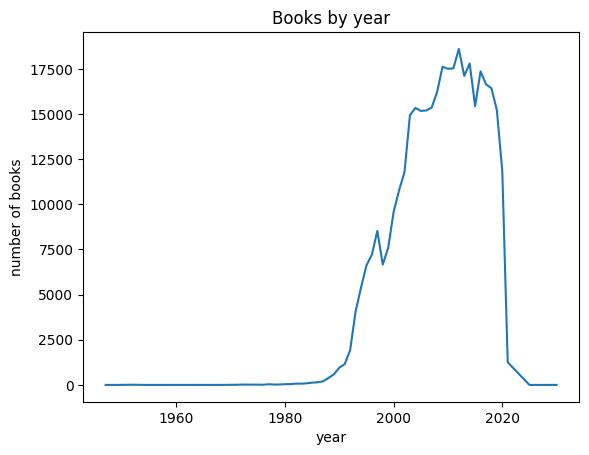

In [68]:
plt.plot(count_by_year.index, count_by_year.values)
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

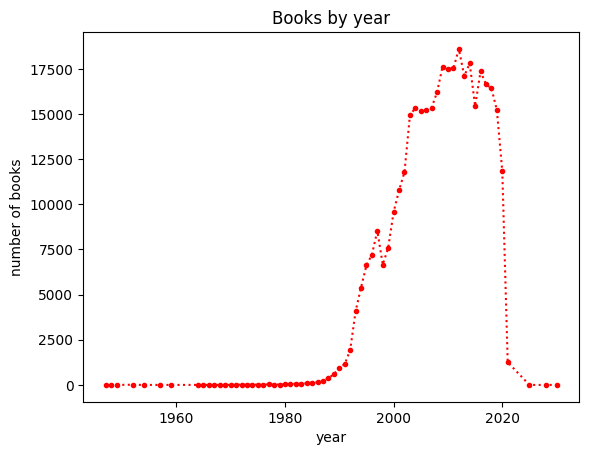

In [69]:
plt.plot(count_by_year, marker='.', linestyle=':', color='red')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

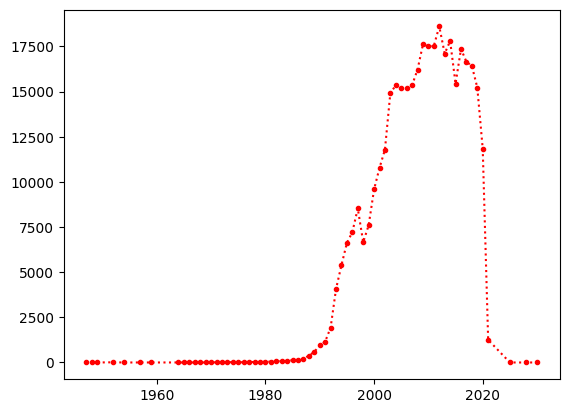

In [70]:
plt.plot(count_by_year,'.:r')

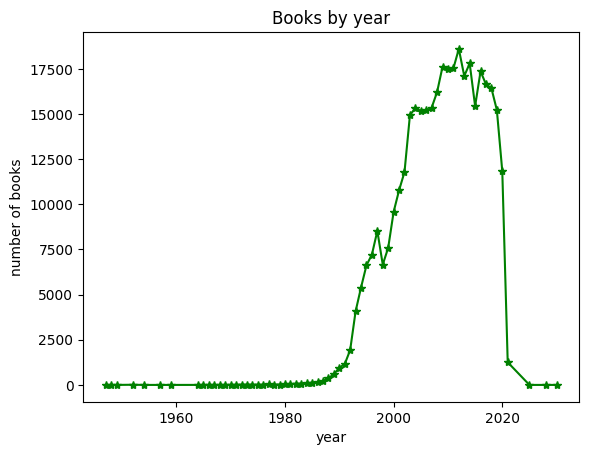

In [71]:
plt.plot(count_by_year, '*-g')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

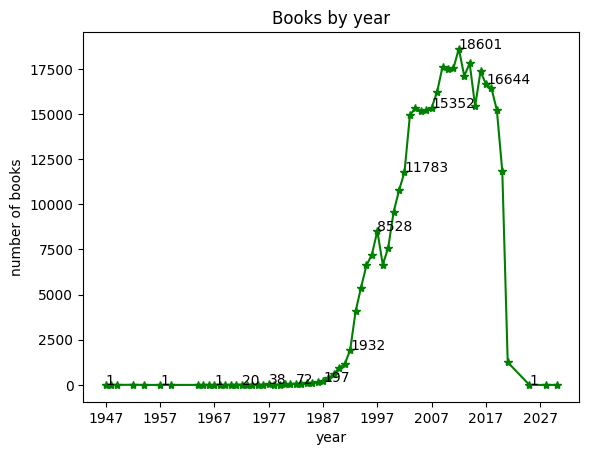

In [72]:
plt.plot(count_by_year, '*-g')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.xticks(range(1947, 2030, 10))
for idx, val in count_by_year[::5].items():
    plt.annotate(val, (idx, val)) # (그래프에 나타날 문자열, (텍스트가 나타날 x,y 좌표))
plt.show()

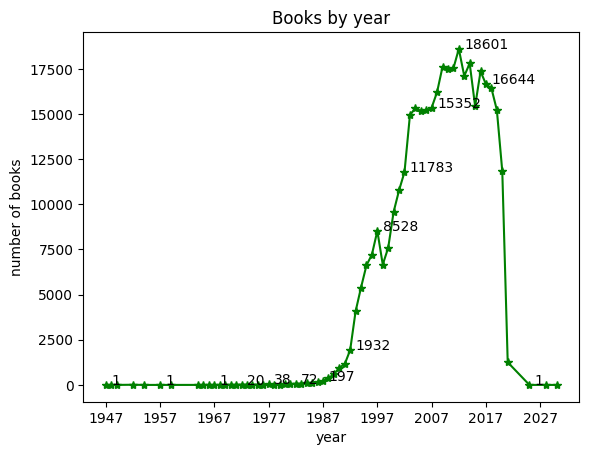

In [73]:
plt.plot(count_by_year, '*-g')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.xticks(range(1947, 2030, 10))
for idx, val in count_by_year[::5].items():
    plt.annotate(val, (idx, val), xytext=(idx+1, val+10))
plt.show()

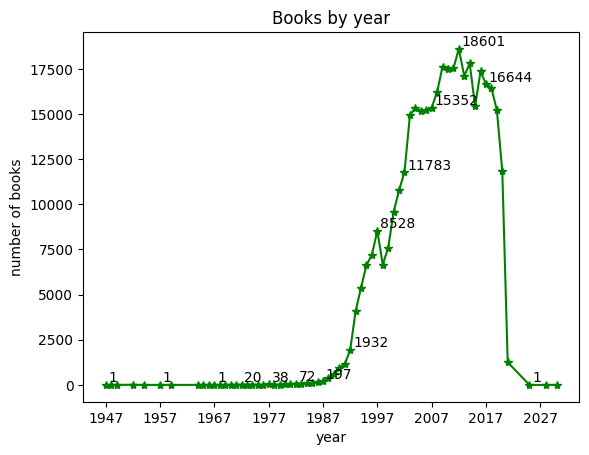

In [74]:
plt.plot(count_by_year, '*-g')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.xticks(range(1947, 2030, 10))
for idx, val in count_by_year[::5].items():
    plt.annotate(val, (idx, val), xytext=(2, 2), textcoords='offset points')
plt.show()

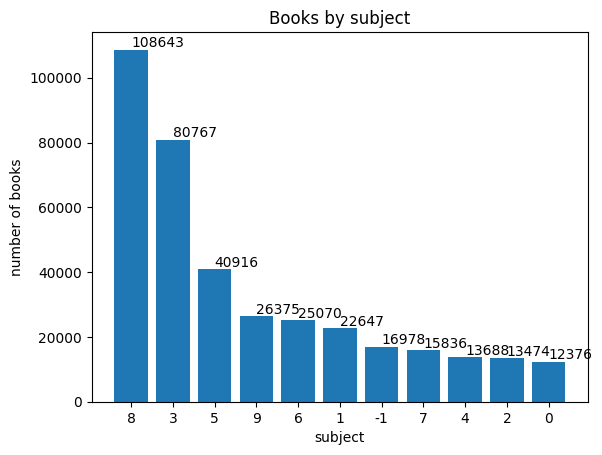

In [75]:
plt.bar(count_by_subject.index, count_by_subject.values)
plt.title('Books by subject')
plt.xlabel('subject')
plt.ylabel('number of books')
for idx, val in count_by_subject.items():
    plt.annotate(val, (idx, val), xytext=(0, 2), textcoords='offset points')
plt.show()

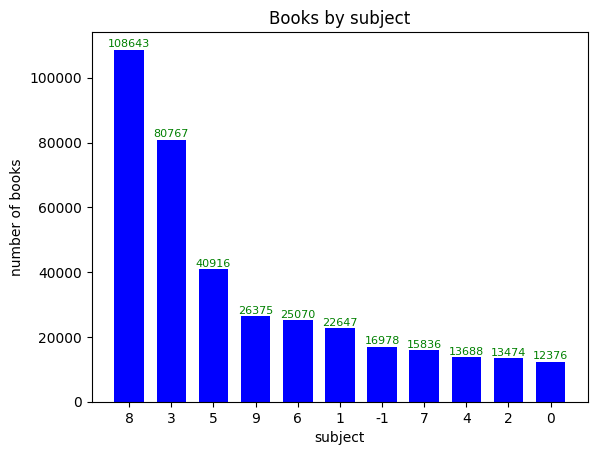

In [76]:
plt.bar(count_by_subject.index, count_by_subject.values, width=0.7, color='blue')
plt.title('Books by subject')
plt.xlabel('subject')
plt.ylabel('number of books')
for idx, val in count_by_subject.items():
    plt.annotate(val, (idx, val), xytext=(0, 2), textcoords='offset points',
                 fontsize=8, ha='center', color='green')
plt.show()

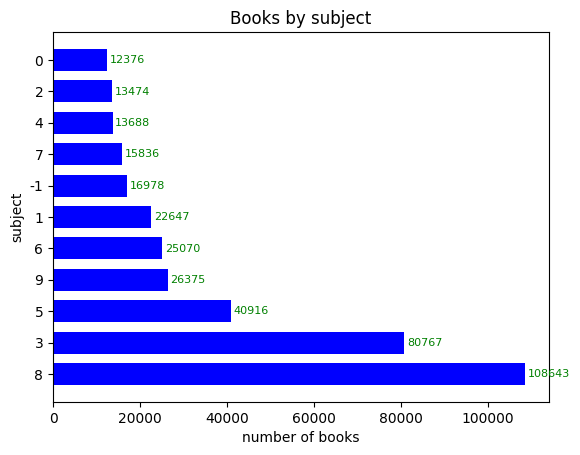

In [77]:
plt.barh(count_by_subject.index, count_by_subject.values, height=0.7, color='blue')
plt.title('Books by subject')
plt.xlabel('number of books')
plt.ylabel('subject')
for idx, val in count_by_subject.items():
    plt.annotate(val, (val, idx), xytext=(2, 0), textcoords='offset points',
                 fontsize=8, va='center', color='green')
plt.show()

# Downloading the Graph as an Image

---



In [78]:
plt.rcParams['savefig.dpi']

'figure'

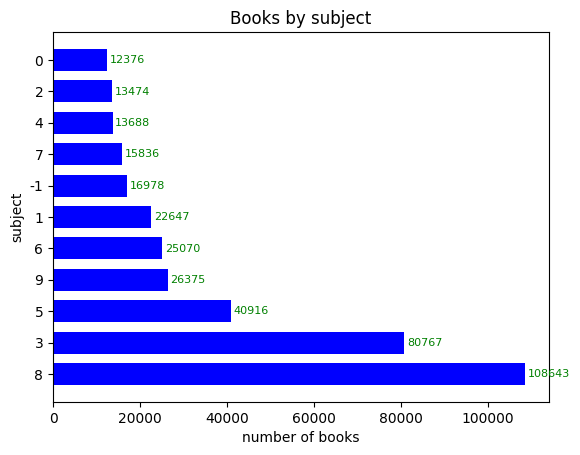

In [79]:
plt.barh(count_by_subject.index, count_by_subject.values, height=0.7, color='blue')
plt.title('Books by subject')
plt.xlabel('number of books')
plt.ylabel('subject')
for idx, val in count_by_subject.items():
    plt.annotate(val, (val, idx), xytext=(2, 0), textcoords='offset points',
                 fontsize=8, va='center', color='green')
plt.savefig('books_by_subject.png')
plt.show()

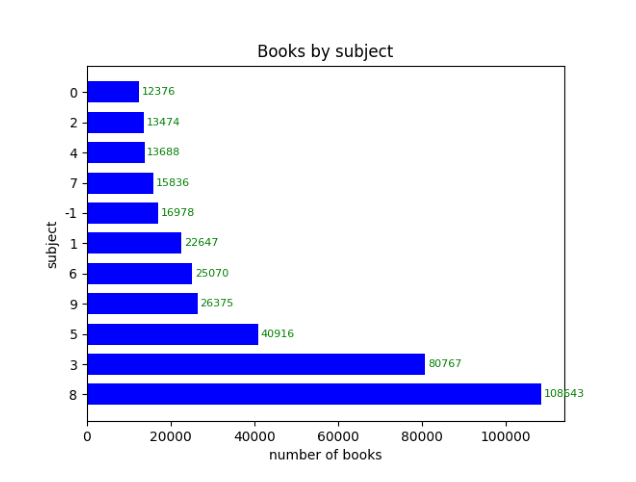

In [82]:
from PIL import Image
pil_img = Image.open('books_by_subject.png')

plt.figure(figsize=(8, 6))
plt.imshow(pil_img)
plt.axis('off')
plt.show()

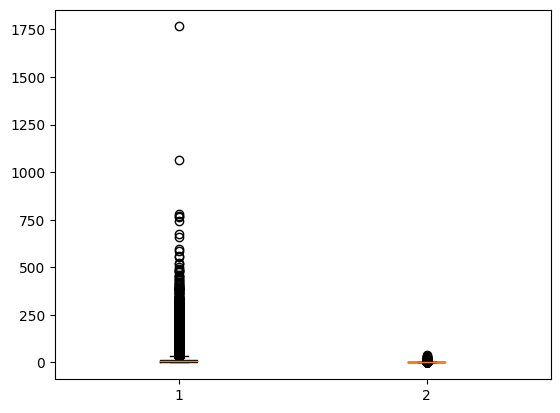

In [83]:
##  box-and-whisker diagram

temp = ns_book7[['대출건수','도서권수']]
plt.boxplot(temp)
plt.show()

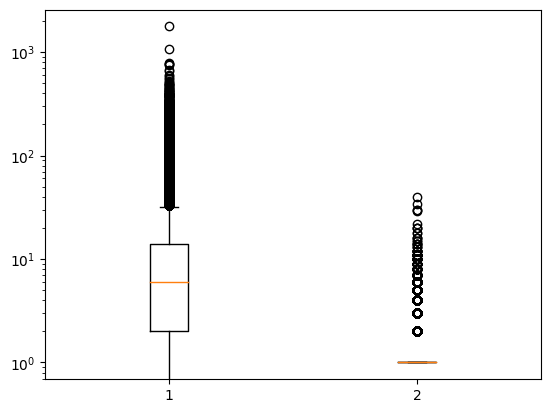

In [84]:
plt.boxplot(ns_book7[['대출건수','도서권수']])
plt.yscale('log')
plt.show()

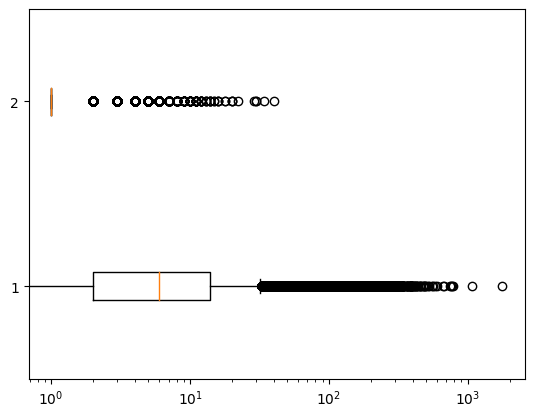

In [85]:
plt.boxplot(ns_book7[['대출건수','도서권수']], vert=False)
plt.xscale('log')
plt.show()

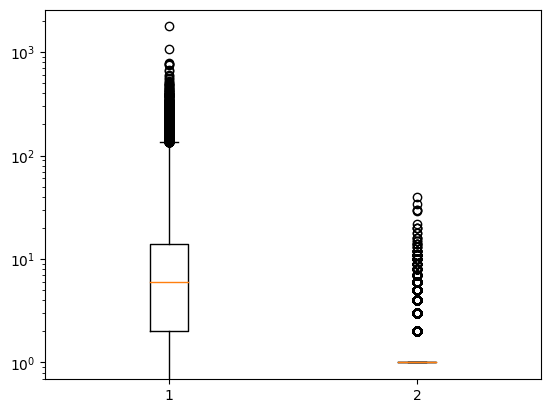

In [86]:
plt.boxplot(ns_book7[['대출건수','도서권수']], whis=10)
plt.yscale('log')
plt.show()

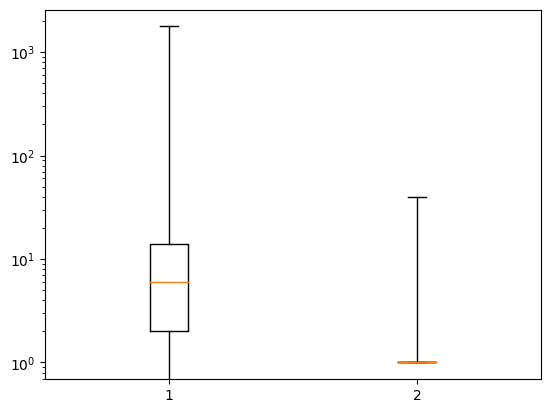

In [87]:
plt.boxplot(ns_book7[['대출건수','도서권수']], whis=(0,100))
plt.yscale('log')
plt.show()